In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/bureau_report_risk.csv')
df.head()

,Customer ID,Age,Credit Score,Existing Loans,Utilization,Missed Payments (12M),Total Outstanding Debt,Debt-to-Income Ratio,Risk Classification
0,1,41,900,1,0.23,0,212419.47,0.36,Low Risk
1,2,31,850,3,0.16,0,102459.62,0.40,Low Risk
2,3,35,670,2,0.51,1,308971.17,0.78,High Risk
3,4,30,610,3,0.87,3,245102.21,0.70,High Risk
4,5,21,530,4,0.87,4,478109.11,0.64,High Risk


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,100.0,50.5000,29.011492,1.00,25.7500,50.500,75.2500,100.00
Age,100.0,40.7800,11.139682,21.00,32.7500,40.000,51.2500,60.00
Credit Score,100.0,719.4000,101.929070,500.00,650.0000,720.000,800.0000,900.00
Existing Loans,100.0,2.2700,1.813836,0.00,1.0000,2.000,4.0000,5.00
Utilization,100.0,0.4979,0.298015,0.00,0.2375,0.515,0.7500,0.99
Missed Payments (12M),100.0,2.0700,2.021376,0.00,0.0000,2.000,4.0000,6.00
Total Outstanding Debt,100.0,250379.5924,146275.748149,2424.01,114420.0575,254323.195,376668.8275,497555.14
Debt-to-Income Ratio,100.0,0.4479,0.210110,0.10,0.2675,0.450,0.6400,0.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             100 non-null    int64  
 1   Age                     100 non-null    int64  
 2   Credit Score            100 non-null    int64  
 3   Existing Loans          100 non-null    int64  
 4   Utilization             100 non-null    float64
 5   Missed Payments (12M)   100 non-null    int64  
 6   Total Outstanding Debt  100 non-null    float64
 7   Debt-to-Income Ratio    100 non-null    float64
 8   Risk Classification     100 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 7.2+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# checking for missing values
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Customer ID,0,0.0
Age,0,0.0
Credit Score,0,0.0
Existing Loans,0,0.0
Utilization,0,0.0
Missed Payments (12M),0,0.0
Total Outstanding Debt,0,0.0
Debt-to-Income Ratio,0,0.0
Risk Classification,0,0.0


In [8]:
# Removing unwanted columns
df.drop(['Customer ID'], axis=1, inplace=True)

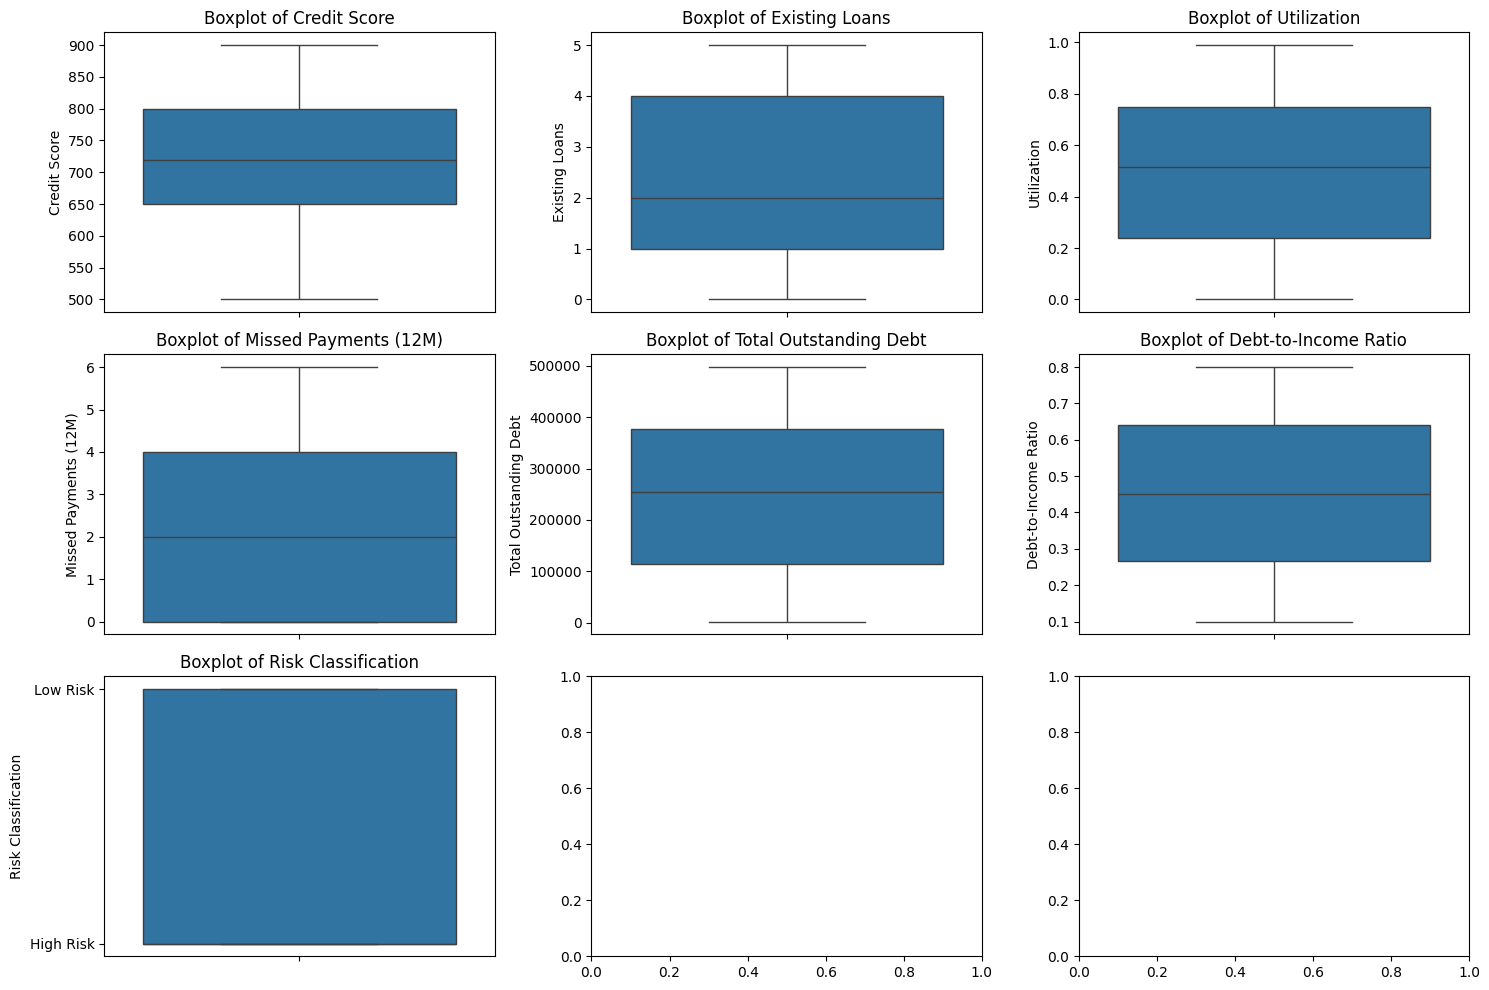

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  
axes = axes.flatten()  
for i, col in enumerate(df.columns[1:]):  
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")  

plt.tight_layout()  
plt.show()

#### Basic Insights

- Dataset has  `100 entries` which mean simpler model need to be used like Logistic Regression / Decision Tree
- Target Value :- Risk Classification (Low Risk, High Risk)
- No missing values
- No Duplicate values
- No significant outlier

In [10]:
def feature_engineering(df: pd.DataFrame) -> None:
    df['Monthly Debt'] = df['Total Outstanding Debt'] * df['Debt-to-Income Ratio']/12
    df['Dept per loan'] = df['Total Outstanding Debt'] / (df['Existing Loans'] + 1)
    df['Loan per age'] = df['Existing Loans'] / df['Age']

In [11]:
feature_engineering(df)

<Axes: >

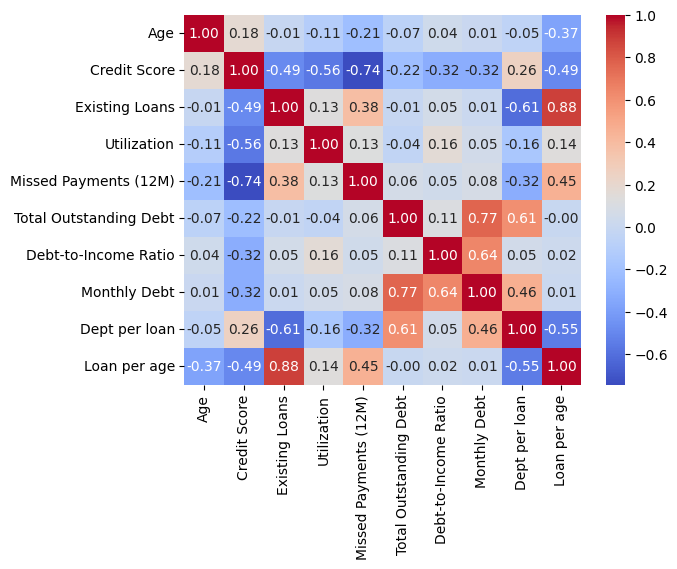

In [12]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

correlation = df[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

#### Correlation Insights
- Credit Score is strongly linked to financial behavior – factors like missed payments and loan utilization play a big role in determining risk.
- Debt-to-Income Ratio, Total Debt, and Monthly Debt are crucial – they indicate how financially burdened a customer is.
- Existing Loans and Missed Payments together signal higher risk – customers juggling multiple loans are more likely to default.

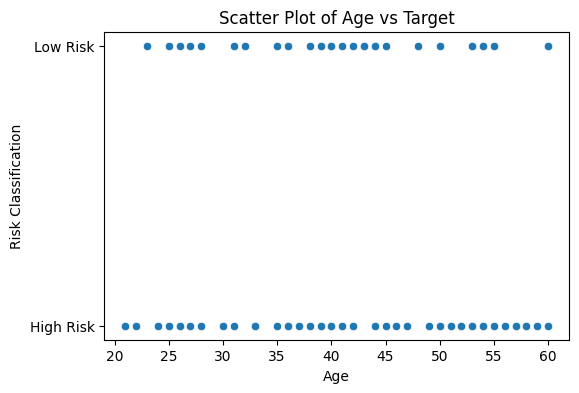

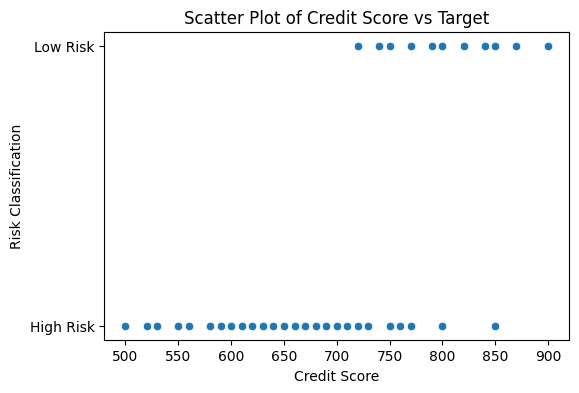

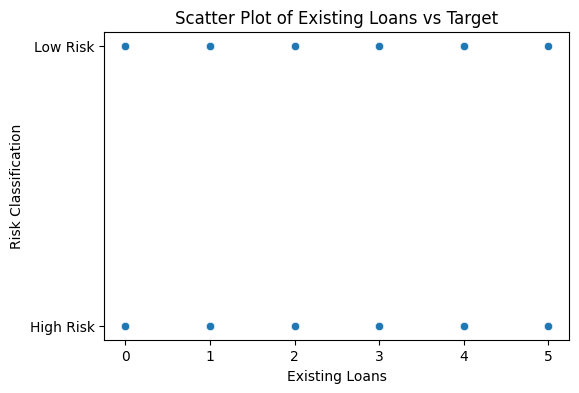

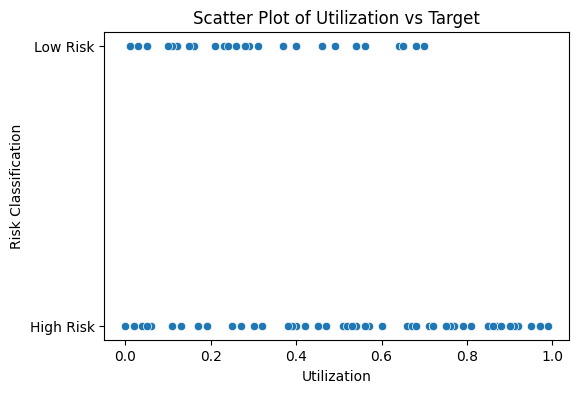

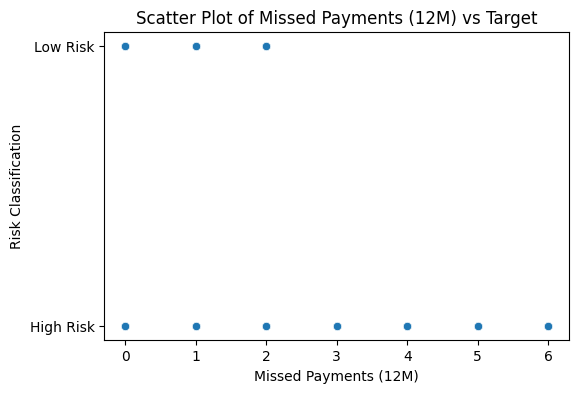

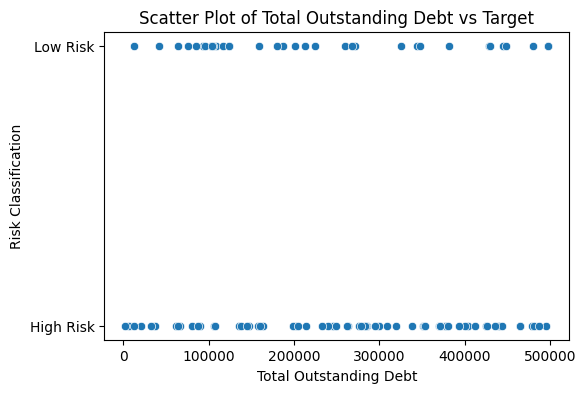

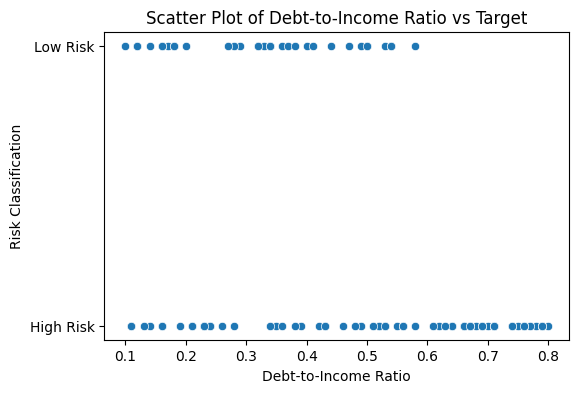

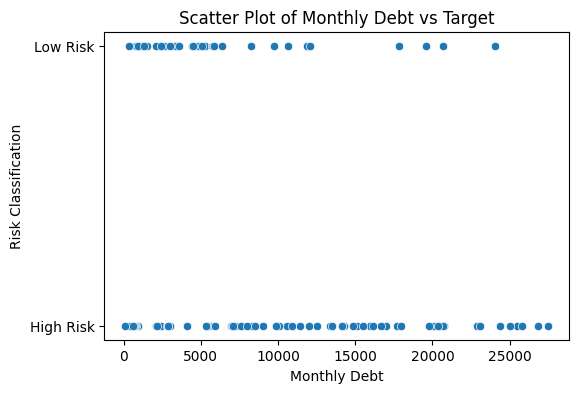

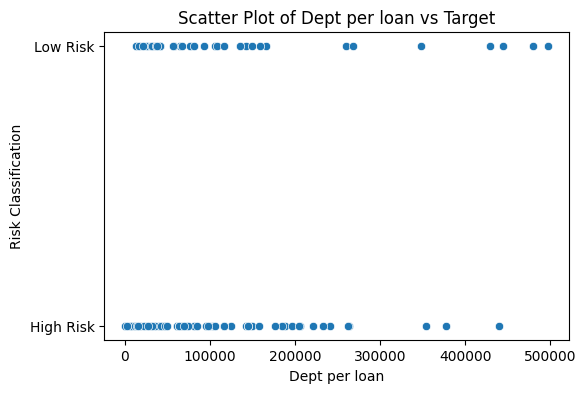

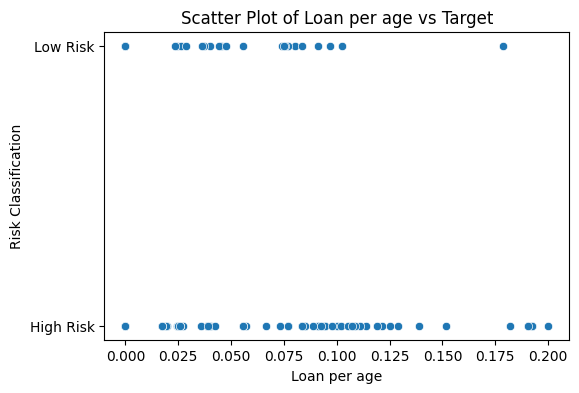

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.drop(columns=['Risk Classification']):  
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Risk Classification'])
    plt.title(f'Scatter Plot of {col} vs Target')
    plt.show()
